# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр. 9381 Прашутинский Кирилл, вариант 58.

## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения

#### Бинарный метод

Бинарный метод - это алгоритм быстрого возведения числа $x$ в степень $n\in \mathbb{N}$.

Алгоритм:  
Число $x$ представляется в двоичном виде, после чего из этого двоичного представления удаляется старшая единица. Просматривая биты от старшего к младшему, возводим $x$ в квадрат на каждой итерации, при этом если очередной бит числа равен 1, то к результату произведения прибавляем $x$. 

Количество операций:  
$\lambda(n)+\nu(n)-1$, где $\lambda(n)=\lceil log_2(n) \rceil$, а $\nu(n)$ равно количеству единиц в двоичной записи числа $n$.

#### Метод множителей

Метод множителей - это алгоритм быстрого возведения числа $x$ в степень $n\in \mathbb{N}$.

Алгоритм:  
Производится поиск минимального простого делителя числа $n$ ($n=i \cdot j$), где $i$ - минимальный простой делитель числа $n$). Далее при помощи бинарного метода число &x& возводится в степень $i$, после чего полученный результат $x^i=y$ возводится в степень $j$: $y^j={(x^i)}^j=x^{i\cdot j}=x^n$. Если $n$ - простое число, то алгоритм сначала возводит число $x$ в степень $n-1$, а потом домножает на $x$.

Количество операций:  
$\lambda(i)+\nu(i)+\lambda(j)+\nu(j)-2$ (в случае, если число не простое), иначе - $\lambda(n-1)+\nu(n-1)$

#### Аддитивные цепочки

Аддитивная цепочка для некоторого числа $n\in \mathbb{N}$ - это последовательность натуральных чисел $\{a_i\}_{i=0}^m$, начинающаяся с единицы, в которой каждый последующий элемент является суммой двух любых предшествующих элементов. Эта последовательность удовлетворяет свойствам:
1. $a_0 = 1$;
2. $\forall i > 0: a_i = a_j + a_k$, где $j, k < i$.

Длина аддитивной цепочки $l(n)=|\{a_i\}_{i=0}^m|$, где $a_m = n$.

$a_i=a_j+a_k$ - шаг аддитивной цепочки, $i \in \{1,2 \dots m\}$, $0\leqslant k\leqslant j < i$

Типы шагов в аддитивной цепочке:
1. Удвоение:  $i - 1 = k = j$;
2. Звездный шаг: $j = i - 1$, $k \in \{0, \dots, i-1\}$;
3. Малый шаг: $\lambda(a_i)=\lambda(a_{i-1})$

Звездная цепочка - это аддитивная цепочка, в которая состоит только из звездных шагов.

#### Алгоритм Яо

Алгоритм Яо - это алгоритм для поиска аддитивной цепочки для некоторого числа $n \in \mathbb{N}$. Cначала фиксируются переменные $n,k \geq 2$, после чего $n$ представляется в виде $\sum_{i=0} a_j \cdot 2^{ik}$, где $a_j \neq 0$. 

Далее вводится функция $d(z)=\sum_{\forall i: a_i=z} 2^{ik}$.

В начало аддитивной цепочки Яо добавляются степени двойки: $Y_k(n): 1,2,4,\dots ,2^{\lambda(n)}$, после чего вычисляются все значения $d(z)$, где $z \in \{1,2,3, \dots ,2^k-1 \}$ и $d(z) \neq 0$.

В таком случае число $n=\sum_{z=1}^{2^k-1}z \cdot d(z)$.

#### Алгоритм дробления вектора индексов 

Алгоритм дробления вектора индексов позволяет найти минимальную звездную цепочку для некоторого числа $n \in \mathbb{N}$. 

Рассмотрим вектор индексов $\{r_i\}_{i=1}^q \cup {\{{\rho}_j \}}_{j=q+1}^m$, где ${\rho}_j= \{x: 1 \leq x \leq j \}$, ${\{r_i\}}_{i=1}^q$ - фиксированная часть, ${\{{\rho}_j\}}_{j=q+1}^m$ - изменяющаяся часть.

$a_max$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1,q+2,\dots,m\}$.

$a_min$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q}\cup\{1,1,\dots,1\}$.

$a_{max} = a_{q+1} \cdot {2}^{m-q}$

$a_{min} = a_{q+1}+m-q$

Алгоритм:
1. Во внешнем цикле рассматриваем аддитивные цепочки длины $m$ от значения $\bar{l}(n)=\lceil log_2(n) \rceil$ до $\underline{l}(n)=\lambda(n)+\nu(n)-1$, на каждой итерации выбираем $q$ ($1 \leq q \leq m-1$);
2. Далее перебираем все возможные фиксированные части вектора индексов $\{r_i\}_{i=1}^q$ ($q!$ вариантов), для каждой строим соответствующую ей звездную цепочку, находим $a_{max}$ и ${a}_{min}$, после чего:
 1. Если $n \notin [a_{min},a_{max}]$, то переходим к следующему набору $\{r_i\}_{i=1}^q$;
 2. Если $n\in [a_{min},a_{max}]$, то перебираем все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ и находим $a_m$:
  1. Если $a_m=n$, то цепочка найдена;
  2. Если все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ исчерпаны, то переходим к следующему набору $\{r_i\}_{i=1}^q$;
3. Если все наборы вектора индексов длины $m$ исчерпаны, то увеличиваем $m$ на 1.

#### Теорема Брауэра

Для некоторого $k<log_2(log_2(n))$ верно: $l(n)<(1+k^{-1}) \cdot \lceil log_2(n) \rceil +2^{k-1}-k+2$

При $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$ верны следующие следствия:
1. $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)}=1$
2. Наилучшая верхняя оценка для длины аддитивной цепочки: $\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2})$

#### Гипотеза Шольца-Брауэра
Пусть $l^*(n)$ - длина некоторой звёздной цепочки.

Тогда для любого $n \in \mathbb{N}$ верно: $l^*(2^n-1)\leq l^*(n)+n-1$

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n⩾30$, для 2-3 значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1<n⩽10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы



### Бинарный метод и метод множителей  

Бинарный метод возседения числа $x$ в степень $n$:

In [4]:
#only bynary method (1 task)

def dec_to_bin(x):
    binary = bin(x)
    return binary[3::]

def binary_method(x, Ddeg):
    Bindec = dec_to_bin(Ddeg)
    res = x
    count = 0
    for i in range(len(Bindec)):
        if Bindec[i] == '1':
            res *= res * x
            count += 2
        else:
            res *= res
            count += 1
    return [res, count]

print("Результат: {}\tколичество операций: {}".format(*binary_method(6, 47)))
print("Результат: {}\tколичество операций: {}".format(*binary_method(6, 131)))
print("Результат: {}\tколичество операций: {}".format(*binary_method(6, 56)))
print("Результат: {}\tколичество операций: {}".format(*binary_method(20, 3)))

Результат: 3742042951225759540014535187298779136	количество операций: 9
Результат: 866590253542288183694051531743727863541126937352231440806438030493578436223913165685106824007076806656	количество операций: 9
Результат: 37711171281396032013366321198900157303750656	количество операций: 7
Результат: 8000	количество операций: 2


Возведение числа $x$ в степень $n$ методом множителей:  


In [5]:
#mul method with bynary method (1 task)

def min_mult(n):
    for i in range(2,n):
        if n%i==0:
            return i
    return n
    
def mul_method(x,deg):
    if deg==0:
        return [1,0]
    elif deg==1:
        return [x,0]
    deg_first=min_mult(deg)
    if deg_first==deg:
        res=mul_method(x,deg-1)
        return [res[0]*x, res[1]+1]
    deg_second=deg//deg_first
    res_first, operations_first = binary_method(x,deg_first)
    res_second, operations_second = binary_method(res_first,deg_second)
    return [res_second,operations_first+operations_second]



Проверим работу алгоритмов для $x=2$ и $n=22,32,49,64,65,128,129$:

In [ ]:
print("Бинарный метод, x=2:")
print("n=22, результат: {}, потребовалось операций: {}".format(*binary_method(2,22)))
print("n=32, результат: {}, потребовалось операций: {}".format(*binary_method(2,32)))
print("n=49, результат: {}, потребовалось операций: {}".format(*binary_method(2,49)))
print("n=64, результат: {}, потребовалось операций: {}".format(*binary_method(2,64)))
print("n=65, результат: {}, потребовалось операций: {}".format(*binary_method(2,65)))
print("n=128, результат: {}, потребовалось операций: {}".format(*binary_method(2,128)))
print("n=129, результат: {}, потребовалось операций: {}".format(*binary_method(2,129)))
print("\nМетод множителей, x=2:")
print("n=22, результат: {}, потребовалось операций: {}".format(*mul_method(2,22)))
print("n=32, результат: {}, потребовалось операций: {}".format(*mul_method(2,32)))
print("n=49, результат: {}, потребовалось операций: {}".format(*mul_method(2,49)))
print("n=64, результат: {}, потребовалось операций: {}".format(*mul_method(2,64)))
print("n=65, результат: {}, потребовалось операций: {}".format(*mul_method(2,65)))
print("n=128, результат: {}, потребовалось операций: {}".format(*mul_method(2,128)))
print("n=129, результат: {}, потребовалось операций: {}".format(*mul_method(2,129)))

#### Выводы по бинарному методу и методу множителей.

   В зависимости от степени по количеству операций может быть выгоднее как бинарный метод, так и метод множителей.
   При $n = 2^k-1$ метод множителей  эффективнее бинарного метода. При $n = 2^k+1$ бинарный метод эффективнее, чем метод множителей. В остальных случаях метод множителей выполняется за такое же число операций или быстрее.


### Алгоритм Яо

In [8]:
def LenMin(n):
    return sum(map(int, bin(n)[2:])) + len(bin(n)[2:]) - 1


def yao(n, k):
    YaoReturn = [2 ** i for i in range(len(bin(n)[2:]))]  # first part chain
    mods = []
    koef = 2 ** k
    ZsummDZ = 0
    dn = n
    while dn != 0:
        mods.append(dn % koef)
        dn = dn // koef
    for z in range(1, 2 ** k):
        # dz = d(Y,mods,z)

        res = 0
        for i in range(len(mods)):
            if mods[i] == z:
                res += 2 ** (i * k)
                if res not in YaoReturn:
                    YaoReturn.append(res)
        dz = res

        if dz != 0:
            summ = dz
            r = [dz]
            bits = bin(z)[3:]
            for bit in bits:
                summ *= 2
                r.append(summ)
                if bit == '1':
                    summ += dz
                    r.append(summ)
            adds = r

            for elem in adds:
                if elem not in YaoReturn:
                    YaoReturn.append(elem)
            ZsummDZ = ZsummDZ + adds[-1]
            if ZsummDZ not in YaoReturn:
                YaoReturn.append(ZsummDZ)
    return YaoReturn

Ниже реализован вывод длины аддитивной цепочки, полученной алгоритмом Яо и минимальной аддитивной цепочки для заданных n и k.

In [12]:
n = int(input("Введите n:"))
k = int(input("Введите k:"))
print(f"Длина минимальной цепочки = {LenMin(n)}")
print(f"Длина цепочки Яо = {len(yao(n, k))}")
print(f"Цепочка: {format(yao(n, k))}")

Введите n:123
Введите k:4
Длина минимальной цепочки = 12
Длина цепочки Яо = 14
Цепочка: [1, 2, 4, 8, 16, 32, 64, 48, 96, 112, 5, 10, 11, 123]


##### Работа алгоритма при различных введенных данных  

__Введите n:4561
Введите k:3__
Длина минимальной цепочки = 18
Длина цепочки Яо = 19
Цепочка: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 4097, 4113, 192, 384, 448, 4561]


__Введите n:49984
Введите k:2__
Длина минимальной цепочки = 20
Длина цепочки Яо = 20
Цепочка: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 16640, 33280, 49920, 49984]


__Введите n:123
Введите k:4__  
Длина минимальной цепочки = 12
Длина цепочки Яо = 14
Цепочка: [1, 2, 4, 8, 16, 32, 64, 48, 96, 112, 5, 10, 11, 123]

#### Вывод по алгоритму Яо  

На основе выполненных тестов, некоторые из которых приведены выше, были сделаны выводы о том, что алгоритм Яо находит аддитивную цепочку минимальной длины для небольших значений $n$, однако прибольших $n$ длина полученной аддитивной цепочки отличается от минимальной. Также было замечено, что длина полученной цепочки может зависеть от значения $k$. Для некоторыхы чисел длина цепочки была больше при большем $k$.

### Алгоритм дробления вектора индексов  
Реализация алгоритма для нахождения минимальной аддитивной цепочки для числа $n$ приведена ниже:

In [ ]:
import math
import time

def decRi(ri, q = 1):
    m = q + len(ri) - 1
    for i in range(1, len(ri) + 1):
        if ri[-i] == 1:
            if i == len(ri):
                ri.append(1)
                for j in range(len(ri)):
                    ri[j] = j + q
                break
            ri[-i] = m
            m -= 1
        else:
            ri[-i] -= 1
            break

def buildStarChain(ri):
    starChain = [1]
    for i in ri:
        starChain.append(starChain[-1] + starChain[i - 1])
    return starChain
    
def findMinStarChain (n):
    downBorder = int(math.log2(n))
    upBorder = int(log(n, 2) + bin(n).count('1') - 1)
    
    for m in range(downBorder, upBorder + 1):
        q = m // 2
        
        if q == 0:
            q = 1
        
        ri = [i for i in range(1, q + 1)]
                
        while (len(ri) == q):
            _ri = [i + q for i in range (1, m - q + 1)]
            chain = buildStarChain(ri)
            
            Amax = chain[-1] * 2 ** (m - q)
            Amin = chain[-1] + m - q
            
            if Amin == n:
                return buildStarChain(ri + [1 for i in range(1, m - q + 1)])
            if Amax == n:
                return buildStarChain(ri + [i + q for i in range (1, m - q + 1)])
            if Amin > n or n > Amax:
                decRi(ri)
                continue
            while len(_ri) == m - q:
                chain = buildStarChain(ri + _ri)
                if chain[-1] == n:
                    return chain
                decRi(_ri, q + 1)
            decRi(ri)
               
start = time.time()
minStarChain = findMinStarChain(50)
end = time.time()
print(minStarChain, "Len:", len(minStarChain), "Elapsed time:", end - start)

Вывод результата работы алгоритма:

In [ ]:
import math
import time
import random

for i in range(20):
    r = random.randint(10,200)
    start = time.time()
    minStarChain = findMinStarChain(r)
    end = time.time()
    print(r," : ",minStarChain, "Len:", len(minStarChain), "Elapsed time:", end - start)

#### Результат работы алгоритма:  

___175___  :  [1, 2, 4, 8, 16, 32, 36, 37, 69, 138, 175] Len: 11 Elapsed time: 4.162713289260864<br>
___121___  :  [1, 2, 4, 8, 16, 32, 40, 80, 120, 121] Len: 10 Elapsed time: 0.346343994140625<br>
___122___  :  [1, 2, 4, 8, 16, 32, 40, 80, 120, 122] Len: 10 Elapsed time: 0.33993077278137207<br>
___56___  :  [1, 2, 4, 8, 16, 32, 48, 56] Len: 8 Elapsed time: 0.003912925720214844<br>
___66___  :  [1, 2, 4, 8, 16, 32, 64, 66] Len: 8 Elapsed time: 0.025324583053588867<br>
___179___  :  [1, 2, 4, 8, 16, 32, 48, 49, 98, 147, 179] Len: 11 Elapsed time: 4.033940553665161<br>
___57___  :  [1, 2, 4, 8, 16, 32, 48, 56, 57] Len: 9 Elapsed time: 0.05185818672180176<br>
___90___  :  [1, 2, 4, 8, 16, 18, 36, 72, 90] Len: 9 Elapsed time: 0.050008535385131836<br>
___158___  :  [1, 2, 4, 8, 16, 32, 48, 52, 104, 156, 158] Len: 11 Elapsed time: 4.098759651184082<br>
___135___  :  [1, 2, 4, 8, 9, 18, 36, 45, 90, 135] Len: 10 Elapsed time: 1.8200297355651855<br>
___175___  :  [1, 2, 4, 8, 16, 32, 36, 37, 69, 138, 175] Len: 11 Elapsed time: 4.252107381820679<br>
___112___  :  [1, 2, 4, 8, 16, 32, 64, 96, 112] Len: 9 Elapsed time: 0.07918000221252441<br>
___78___  :  [1, 2, 4, 8, 16, 24, 26, 52, 78] Len: 9 Elapsed time: 0.05030560493469238<br>
___155___  :  [1, 2, 4, 8, 16, 32, 48, 49, 98, 147, 155] Len: 11 Elapsed time: 4.057909965515137<br>
___66___  :  [1, 2, 4, 8, 16, 32, 64, 66] Len: 8 Elapsed time: 0.2803037166595459<br>
___11___  :  [1, 2, 4, 8, 10, 11] Len: 6 Elapsed time: 0.24065780639648438<br>
___93___  :  [1, 2, 4, 8, 16, 20, 36, 72, 92, 93] Len: 10 Elapsed time: 0.618739128112793<br>
___126___  :  [1, 2, 4, 8, 16, 32, 40, 42, 84, 126] Len: 10 Elapsed time: 0.3396623134613037<br>
___24___  :  [1, 2, 4, 8, 16, 24] Len: 6 Elapsed time: 0.0012698173522949219<br>
___38___  :  [1, 2, 4, 8, 16, 32, 36, 38] Len: 8 Elapsed time: 0.008474588394165039<br>

Сравнение длин аддитивных цепочек, полученных разными алгоритмами:  

In [ ]:
for i in range(4):
    r = random.randint(500,700)
    print(r," : ", "Len Yao:", len(findMinStarChain(r)), "Len DVI:", len(findMinStarChain(r)))

#### Вывод по алгоритму дробления вектора индексов.  

Алгоритм дробления индексов находит цепочки, меньшие по длине, чем алгоритм Яо. Однако вычисление данным методом цепочек для $n$>500 занимает большое количество времени, поэтому данный алгоритм неудобен и обладает низкой эффективностью.

### Следствие 1 теоремы Брауэра.

Проверим следствие 1 теоремы Брауэра для n=1..200 путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов.  
Создадим массив с результатами значения для всех n 1..200 алгоритмом ДВИ.  
После вычислим для каждого значения ln(x) и yln(x).

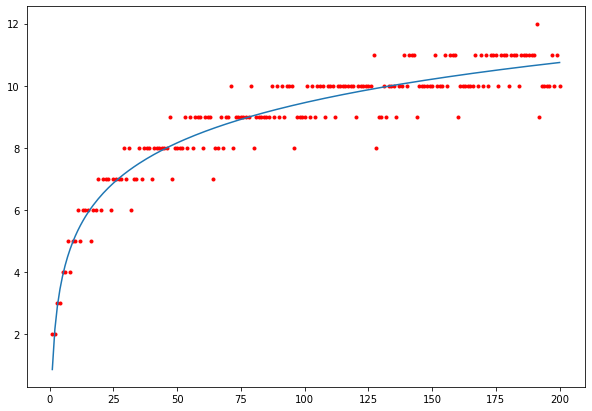

In [26]:
import pylab as plt


n = 201
x = [i for i in range(1, n)]
results = [len(findMinStarChain(i)) for i in range(1, n)]
lnxi = [math.log(i, math.e) for i in range(1, n)]
lnxi_pow2 = [pow(math.log(i, math.e),2) for i in range(1, n)]
ylnxi = [results[i-1] * lnxi[i-1] for i in range(1, n)]

b = (n*sum(ylnxi) - sum(results)*sum(lnxi))/(n*sum(lnxi_pow2) - sum(lnxi)*sum(lnxi))
a = (sum(results) - b * sum(lnxi))/(n-1)

y = [a + b*lnxi[i-1] for i in range(1, n)]

plt.figure(figsize=(10, 7))
plt.scatter(x, results, color = 'red', marker = '.')
plt.plot(x, y)
plt.show()

#### Вывод по следствию 1 из теоремы Брауэра.  

По графику видно, что график логарифма аппроксимирует найденные минимальные длины цепочек(для 1 <= n <= 200).  
Первое следствие теоремы Брауэра справедливо: $\lim_{x \to \infty} l(n)/\lambda(n)=1$.

### Гипотеза Шольца-Брауэра.

Проверим неравенство $l*(2^n-1)<=l*(n)+n-1$ для 1<n<10 с помощью алгоритма ДВИ.

In [6]:
import math
import time

def decRi(ri, q = 1):
    m = q + len(ri) - 1
    for i in range(1, len(ri) + 1):
        if ri[-i] == 1:
            if i == len(ri):
                ri.append(1)
                for j in range(len(ri)):
                    ri[j] = j + q
                break
            ri[-i] = m
            m -= 1
        else:
            ri[-i] -= 1
            break

def buildStarChain(ri):
    starChain = [1]
    for i in ri:
        starChain.append(starChain[-1] + starChain[i - 1])
    return starChain
    
def findMinStarChain (n):
    downBorder = int(math.log2(n))
    upBorder = int(log(n, 2) + bin(n).count('1') - 1)
    
    for m in range(downBorder, upBorder + 1):
        q = m // 2
        
        if q == 0:
            q = 1
        
        ri = [i for i in range(1, q + 1)]
                
        while (len(ri) == q):
            _ri = [i + q for i in range (1, m - q + 1)]
            chain = buildStarChain(ri)
            
            Amax = chain[-1] * 2 ** (m - q)
            Amin = chain[-1] + m - q
            
            if Amin == n:
                return buildStarChain(ri + [1 for i in range(1, m - q + 1)])
            if Amax == n:
                return buildStarChain(ri + [i + q for i in range (1, m - q + 1)])
            if Amin > n or n > Amax:
                decRi(ri)
                continue
            while len(_ri) == m - q:
                chain = buildStarChain(ri + _ri)
                if chain[-1] == n:
                    return chain
                decRi(_ri, q + 1)
            decRi(ri)

for n in range (2,11):
    left=findMinStarChain(pow(2,n)-1)
    right=findMinStarChain(n)
    if len(left)<=len(right)+n-1:
        print("Гипотеза подтвердилась, {}<={}+{}-1\n".format(len(left),len(right),n))
    else:
        print("Гипотеза не подтвердилась,{}>{}+{}-1\n".format(len(left),len(right),n))

Гипотеза подтвердилась, 3<=2+2-1

Гипотеза подтвердилась, 5<=3+3-1

Гипотеза подтвердилась, 6<=3+4-1

Гипотеза подтвердилась, 8<=4+5-1

Гипотеза подтвердилась, 9<=4+6-1

Гипотеза подтвердилась, 11<=5+7-1

Гипотеза подтвердилась, 11<=4+8-1



KeyboardInterrupt: 

Результат работы:  
Гипотеза подтвердилась, 3<=2+2-1

Гипотеза подтвердилась, 5<=3+3-1

Гипотеза подтвердилась, 6<=3+4-1

Гипотеза подтвердилась, 8<=4+5-1

Гипотеза подтвердилась, 9<=4+6-1

Гипотеза подтвердилась, 11<=5+7-1

Гипотеза подтвердилась, 11<=4+8-1  

Гипотеза подтвердилась, 13<=5+9-1 

Гипотеза подтвердилась, 14<=5+10-1

#### Вывод по гипотезе Шольца-Брауэра.  
Гипотеза подтвердилась для чисел $2<=n<=10$, значит для вычисления длины цепочки $l*(2^n-1)$ достаточно вычислить $l*(n)$+$n$-1.

### Вывод.  
В процессе выполнения практической работы были изучены аддитивные цепочки и были реализованы алгоритмы для работы с ними. Была изучена зависимость минимальных длин звездных цепочек от числа. 
Также был получен навык работы в системе компьютерной алгебры SageMath.
Реализованные алгоритмы:
1. Бинарный метод
2. Метод множителей 
3. Алгоритм Яо
4. Алгоритм дробления вектора индекса

Также были проверены:
1. Первое следствие теоремы Брауэра 
2. Гипотеза Шольца-Брауэра для n=1..10